In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import seaborn as sns
from matplotlib.pyplot import figure

In [4]:
data = pd.read_excel('all_merged_raw.xlsx')

In [5]:
sofifa = pd.read_excel('players_merged_clean.xlsx')

In [4]:
data['Value']=data['Value'].astype(int)
data['ln_value'] = np.log10(data['Value'])

In [29]:
ev = []
percentile = []
maxim = []
median = []
year = list(range(2007,2022))

for i in range(15):
    ev.append(data.loc[data['Year'] == year[i]])

for j in range(15):
    percentile.append(np.percentile(ev[j]['Value'],75))
    maxim.append(np.percentile(ev[j]['Value'],100))
    median.append(np.median(ev[j]['Value']))
leiro = pd.DataFrame(list(zip(year, median, percentile, maxim)), 
               columns =['year','median','Q3','max'])



leiro['median'] = leiro['median']/1000
leiro['mrate'] = leiro['median'][14]/leiro['median']
leiro['Q3'] = leiro['Q3']/1000
leiro['qrate'] = leiro['Q3'][14]/leiro['Q3']
leiro['max'] = leiro['max']/1000
leiro['maxrate'] = leiro['max'][14]/leiro['max']

leiro['median'] = leiro['median'].astype(int)
leiro['Q3'] = leiro['Q3'].astype(int)
leiro['max'] = leiro['max'].astype(int)

leiro

,year,median,Q3,max,mrate,qrate,maxrate
0,2007,750,2000,70000,0.800000,0.900000,2.571429
1,2008,700,1750,55000,0.857143,1.028571,3.272727
2,2009,700,1500,60000,0.857143,1.200000,3.000000
3,2010,600,1500,80000,1.000000,1.200000,2.250000
4,2011,500,1300,100000,1.200000,1.384615,1.800000
5,2012,500,1400,100000,1.200000,1.285714,1.800000
6,2013,500,1500,120000,1.200000,1.200000,1.500000
7,2014,500,1500,120000,1.200000,1.200000,1.500000
8,2015,500,1500,120000,1.200000,1.200000,1.500000
9,2016,500,1300,120000,1.200000,1.384615,1.500000


In [ ]:
print("2007")
print("Players: ",len(ev[0]))
print("Mean: ",np.mean(ev[0]['modded']))
print("Median: ",np.median(ev[0]['modded']))
print("75 perc: ",np.percentile(ev[0]['modded'],75))
print('--------')
print("2014")
print("Players: ",len(ev[7]))
print("Mean: ",np.mean(ev[7]['modded']))
print("Median: ",np.median(ev[7]['modded']))
print("75 perc: ",np.percentile(ev[7]['modded'],75))
print('--------')
print("2021")
print("Players: ",len(ev[14]))
print("Mean: ",np.mean(ev[14]['Value']))
print("Median: ",np.median(ev[14]['Value']))
print("75 perc: ",np.percentile(ev[14]['Value'],75))

plt.title('Default')
ev[14]['ln_value'].hist(figsize=[14,6], histtype = 'step', linewidth=4)
ev[7]['ln_value'].hist(figsize=[14,6], histtype = 'step', linewidth=4)
ev[0]['ln_value'].hist(figsize=[14,6], histtype = 'step', linewidth=4)
plt.legend([('2021'), ('2014'),('2007')])
plt.xlabel("log value")
plt.ylabel("count")
plt.show()

plt.title('Modified')
ev[14]['ln_value'].hist(figsize=[14,6], histtype = 'step', linewidth=4)
ev[7]['lnmod'].hist(figsize=[14,6], histtype = 'step', linewidth=4)
ev[0]['lnmod'].hist(figsize=[14,6], histtype = 'step', linewidth=4)
plt.legend([('2021'), ('2014'),('2007')])
plt.xlabel("log value")
plt.ylabel("count")
plt.show()

In [ ]:
nagy=[]
rates=[]
years = [*range(2007,2022)]
for i in range(15):
    nagy.append(ev[i].nlargest(100,['Value']))
    
for j in range(15):
    rates.append(np.mean(nagy[14]['Value'])/np.mean(nagy[j]['Value']))
    
for k in range(15):
    data.loc[data['Year'] == years[k], 'modded'] = round(data['Value']*rates[k]).astype(int)
data.loc[data['Name'] == 'L. Messi']

# Percentile

In [30]:
rates=[]
years = [*range(2007,2022)]

    
for j in range(15):
    rates.append(np.percentile(data['Value'].loc[data['Year'] == 2021],75)/np.percentile(data['Value'].loc[data['Year'] == years[j]],75))
    
for k in range(15):
    data.loc[data['Year'] == years[k], 'modded'] = round(data['Value']*rates[k]).astype(int)
data.loc[data['Name'] == 'L. Messi']

,ID,Name,Age,Height_cm,Weight_kg,Country,Club,League,Division,Joined,...,Sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,Value,Wage,Year,modded
37334,158023,L. Messi,19,169,67,Argentina,FC Barcelona,Spain Primera Division,1,NaT,...,NaN,8,9,79,12,16,15000000.0,NaN,2007,13500000.0
37335,158023,L. Messi,20,169,67,Argentina,FC Barcelona,Spain Primera Division,1,NaT,...,NaN,8,20,79,20,20,55000000.0,NaN,2008,56571429.0
37336,158023,L. Messi,21,169,67,Argentina,FC Barcelona,Spain Primera Division,1,NaT,...,NaN,8,20,79,20,20,60000000.0,NaN,2009,72000000.0
37337,158023,L. Messi,22,169,67,Argentina,FC Barcelona,Spain Primera Division,1,NaT,...,NaN,8,20,75,20,20,80000000.0,NaN,2010,96000000.0
37338,158023,L. Messi,23,169,67,Argentina,FC Barcelona,Spain Primera Division,1,2000-01-01,...,20.0,6,11,15,14,8,100000000.0,NaN,2011,138461538.0
37339,158023,L. Messi,24,169,67,Argentina,FC Barcelona,Spain Primera Division,1,2004-01-01,...,20.0,6,11,15,14,8,100000000.0,NaN,2012,128571429.0
37340,158023,L. Messi,25,169,67,Argentina,FC Barcelona,Spain Primera Division,1,2004-07-01,...,20.0,6,11,15,14,8,120000000.0,NaN,2013,144000000.0
37341,158023,L. Messi,26,169,67,Argentina,FC Barcelona,Spain Primera Division,1,2004-07-01,...,20.0,6,11,15,14,8,120000000.0,NaN,2014,144000000.0
37342,158023,L. Messi,27,170,72,Argentina,FC Barcelona,Spain Primera Division,1,2004-07-01,...,20.0,6,11,15,14,8,120000000.0,NaN,2015,144000000.0
37343,158023,L. Messi,28,170,72,Argentina,FC Barcelona,Spain Primera Division,1,2004-07-01,...,21.0,6,11,15,14,8,120000000.0,NaN,2016,166153846.0


In [31]:
round(np.mean(sofifa['Value_clean'].loc[sofifa['Year']==2016]))

1647993

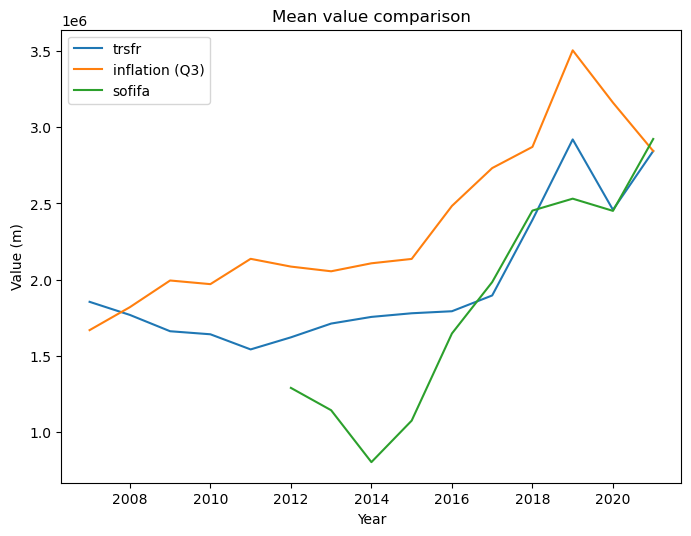

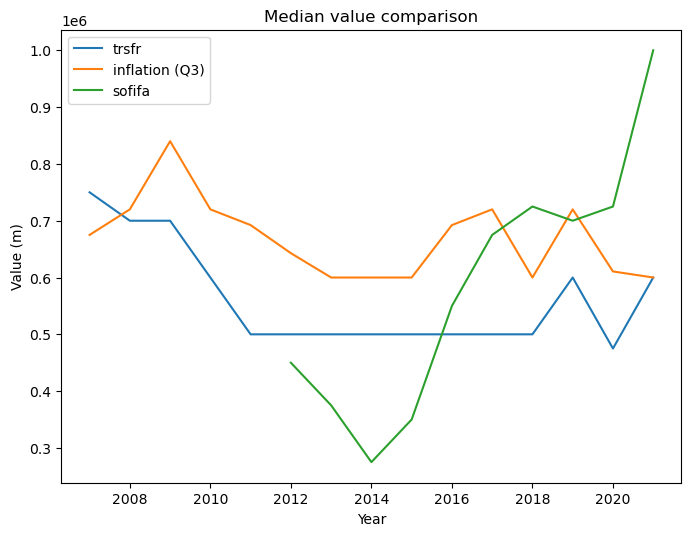

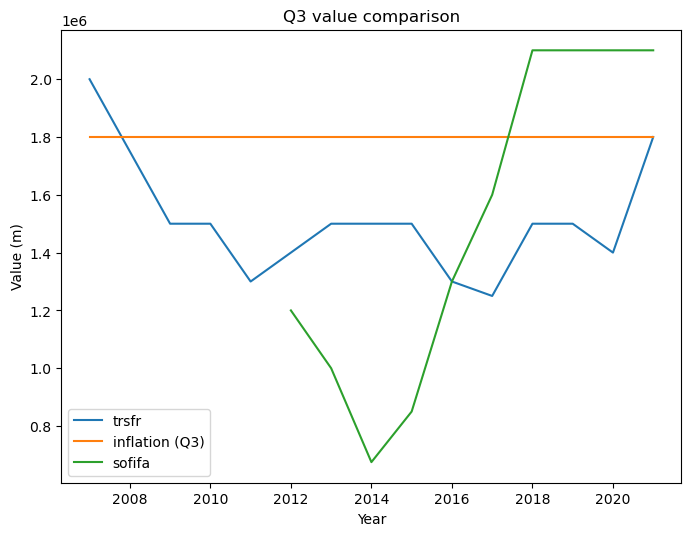

In [32]:
atlag = pd.DataFrame(columns=['Mean'])
med = pd.DataFrame(columns=['Median'])
ye = pd.DataFrame(columns=['Year'])
q = pd.DataFrame(columns=['Q3'])
atlag2 = pd.DataFrame(columns=['Mean'])
med2 = pd.DataFrame(columns=['Median'])
ye2 = pd.DataFrame(columns=['Year'])
q2 = pd.DataFrame(columns=['Q3'])
atlag3 = pd.DataFrame(columns=['Mean'])
med3 = pd.DataFrame(columns=['Median'])
ye3 = pd.DataFrame(columns=['Year'])
q3 = pd.DataFrame(columns=['Q3'])

for i in range(15):
    at = round(np.mean(np.mean(data['Value'].loc[data['Year']==2007+i])))
    me = round(np.median(data['Value'].loc[data['Year']==2007+i]))
    qq = round(np.percentile(data['Value'].loc[data['Year']==2007+i],75))
    atlag = atlag.append({'Mean': at}, ignore_index=True)
    med = med.append({'Median': me}, ignore_index=True)
    q = q.append({'Q3': qq}, ignore_index=True)
for i in range(15):
    year = 2007+i
    ye = ye.append({'Year': year}, ignore_index=True) 
    
for i in range(15):
    at2 = round(np.mean(data['modded'].loc[data['Year']==2007+i]))
    me2 = round(np.median(data['modded'].loc[data['Year']==2007+i]))
    qq2 = round(np.percentile(data['modded'].loc[data['Year']==2007+i],75))
    atlag2 = atlag2.append({'Mean': at2}, ignore_index=True)
    med2 = med2.append({'Median': me2}, ignore_index=True)
    q2 = q2.append({'Q3': qq2}, ignore_index=True)
for i in range(15):
    year2 = 2007+i
    ye2 = ye2.append({'Year': year2}, ignore_index=True)
    
for i in range(10):
    year3 = 2012+i
    me3 = round(np.median(sofifa['Value_clean'].loc[sofifa['Year']==year3]))
    at3 = round(np.mean(sofifa['Value_clean'].loc[sofifa['Year']==year3]))
    qq3 = round(np.percentile(sofifa['Value_clean'].loc[sofifa['Year']==year3],75))
    med3 = med3.append({'Median': me3}, ignore_index=True)
    atlag3 = atlag3.append({'Mean': at3}, ignore_index=True)
    q3 = q3.append({'Q3': qq3}, ignore_index=True)
for i in range(10):
    year3 = 2012+i
    ye3 = ye3.append({'Year': year3}, ignore_index=True)

data2 = [ye["Year"], atlag["Mean"], med["Median"], q["Q3"]]
headers = ["Year", "Mean", "Median", "Q3"]
df3 = pd.concat(data2, axis=1, keys=headers)

data3 = [ye2["Year"], atlag2["Mean"], med2["Median"], q2["Q3"]]
headers = ["Year", "Mean", "Median", "Q3"]
df4 = pd.concat(data3, axis=1, keys=headers)

data4 = [ye3["Year"], atlag3["Mean"], med3["Median"], q3["Q3"]]
headers = ["Year", "Mean", "Median", "Q3"]
df5 = pd.concat(data4, axis=1, keys=headers)

figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title('Mean value comparison')
plt.xlabel("Year")
plt.ylabel("Value (m)")
plt.plot(df3['Year'],df3['Mean'])
plt.plot(df4['Year'],df4['Mean'])
plt.plot(df5['Year'],df5['Mean'])
plt.legend([('trsfr'), ('inflation (Q3)'), ('sofifa')])
plt.show()

figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title('Median value comparison')
plt.xlabel("Year")
plt.ylabel("Value (m)")
plt.plot(df3['Year'],df3['Median'])
plt.plot(df4['Year'],df4['Median'])
plt.plot(df5['Year'],df5['Median'])
plt.legend([('trsfr'), ('inflation (Q3)'), ('sofifa')])
plt.show()

figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title('Q3 value comparison')
plt.xlabel("Year")
plt.ylabel("Value (m)")
plt.plot(df3['Year'],df3['Q3'])
plt.plot(df4['Year'],df4['Q3'])
plt.plot(df5['Year'],df5['Q3'])
plt.legend([('trsfr'), ('inflation (Q3)'), ('sofifa')])
plt.show()

In [46]:
trmed =[]
trmean=[]
trperc=[]
trplay=[]
mmed =[]
mmean=[]
mperc=[]
mplay=[]
smed =[]
smean=[]
sperc=[]
splay=[]
my=[]
ty=[]
sy=[]
for i in range(15):
    trmed.append(np.median(data['Value'].loc[data['Year']==2007+i]).astype(int))
    trmean.append(round(np.mean(data['Value'].loc[data['Year']==2007+i])/1000000,3))
    trperc.append(np.percentile(data['Value'].loc[data['Year']==2007+i],75).astype(int))
    trplay.append(len(data['ID'].loc[data['Year']==2007+i]))
    ty.append(2007+i)

for i in range(15):
    mmed.append(np.median(data['modded'].loc[data['Year']==2007+i]).astype(int))
    mmean.append(round(np.mean(data['modded'].loc[data['Year']==2007+i])/1000000,3))
    mperc.append(np.percentile(data['modded'].loc[data['Year']==2007+i],75).astype(int))
    mplay.append(len(data['ID'].loc[data['Year']==2007+i]))
    my.append(2007+i)

for i in range(10):
    y = 2012+i
    smed.append(np.median(sofifa['Value_clean'].loc[sofifa['Year']==y]).astype(int))
    smean.append(round(np.mean(sofifa['Value_clean'].loc[sofifa['Year']==y])/1000000,3))
    sperc.append(np.percentile(sofifa['Value_clean'].loc[sofifa['Year']==y],75).astype(int))
    splay.append(len(sofifa['ID'].loc[sofifa['Year']==y]))
    sy.append(y)
    
    
print('Transfermarkt')
trf = pd.DataFrame(list(zip(ty, trmean, trmed, trperc,trplay)),columns =['Year','Mean (million)','Median','Q3', 'Count'])
print(trf)
print('-------------------------------------------------------------')
print('Inflation')
modd = pd.DataFrame(list(zip(my, mmean, mmed, mperc, mplay)),columns =['Year','Mean (million)','Median','Q3', 'Count'])
print(modd)
print('-------------------------------------------------------------')
print('Sofifa')
sofi = pd.DataFrame(list(zip(sy, smean, smed, sperc, splay)),columns =['Year','Mean (million)','Median','Q3', 'Count'])
print(sofi)


Transfermarkt
    Year  Mean (million)  Median       Q3  Count
0   2007           1.856  750000  2000000   6513
1   2008           1.770  700000  1750000   8339
2   2009           1.663  700000  1500000  10114
3   2010           1.643  600000  1500000  11162
4   2011           1.544  500000  1300000  11907
5   2012           1.623  500000  1400000  10714
6   2013           1.713  500000  1500000  10602
7   2014           1.757  500000  1500000  10453
8   2015           1.781  500000  1500000  11071
9   2016           1.794  500000  1300000  12093
10  2017           1.897  500000  1250000  12738
11  2018           2.392  500000  1500000  13240
12  2019           2.920  600000  1500000  13055
13  2020           2.459  475000  1400000  13869
14  2021           2.844  600000  1800000  12661
-------------------------------------------------------------
Inflation
    Year  Mean (million)  Median       Q3  Count
0   2007           1.670  675000  1800000   6513
1   2008           1.820  720000

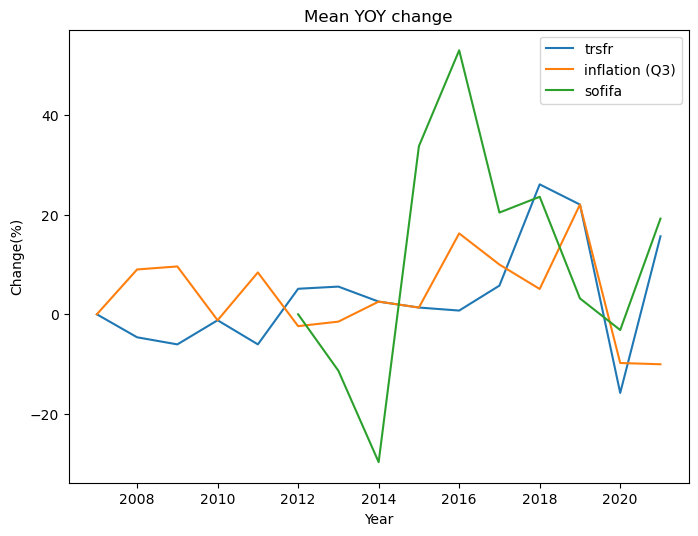

,Year,sofifa
0,2012,0.000000
1,2013,-11.343388
2,2014,-29.699583
3,2015,33.778248
4,2016,53.032346
5,2017,20.437338
6,2018,23.609714
7,2019,3.186595
8,2020,-3.159037
9,2021,19.221041


In [57]:
tryoy=[]
myoy=[]
syoy=[]

for i in range(15):
    year=2007+i
    tryoy.append((np.mean(data['Value'].loc[data['Year']==year])-np.mean(data['Value'].loc[data['Year']==year-1]))/np.mean(data['Value'].loc[data['Year']==year-1])*100)
for i in range(15):
    year=2007+i
    myoy.append((np.mean(data['modded'].loc[data['Year']==year])-np.mean(data['modded'].loc[data['Year']==year-1]))/np.mean(data['modded'].loc[data['Year']==year-1])*100)

for i in range(10):
    year=2012+i
    syoy.append((np.mean(sofifa['Value_clean'].loc[sofifa['Year']==year])-np.mean(sofifa['Value_clean'].loc[sofifa['Year']==year-1]))/np.mean(sofifa['Value_clean'].loc[sofifa['Year']==year-1])*100)

tryoy[0]=0
myoy[0]=0
syoy[0]=0
years=list(range(2007,2022))
years2=list(range(2012,2022))
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title('Mean YOY change')
plt.xlabel("Year")
plt.ylabel("Change(%)")
plt.plot(years,tryoy)
plt.plot(years,myoy)
plt.plot(years2,syoy)
plt.legend([('trsfr'), ('inflation (Q3)'), ('sofifa')])
plt.show()

mdfdd = pd.DataFrame(list(zip(years, tryoy,myoy)),columns =['Year','trsf','infl'])
sdfdd = pd.DataFrame(list(zip(years2, syoy)),columns =['Year','sofifa'])
mdfdd
sdfdd

In [10]:
(np.mean(data['Value'].loc[data['Year']==2008])-np.mean(data['Value'].loc[data['Year']==2007]))/np.mean(data['Value'].loc[data['Year']==2007])*100
(np.mean(data['Value'].loc[data['Year']==2012])-np.mean(data['Value'].loc[data['Year']==2011]))/np.mean(data['Value'].loc[data['Year']==2011])*100


5.129031508160724